In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

The data is from [Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset?select=world_population.csv), which tells us about the population in countries all around the world for different years.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [3]:
file = "world_population.csv"
data_0 = pd.read_csv(file)
data_0.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
#Listing the data columns
data_0.columns.to_list()

['Rank',
 'CCA3',
 'Country',
 'Capital',
 'Continent',
 '2022 Population',
 '2020 Population',
 '2015 Population',
 '2010 Population',
 '2000 Population',
 '1990 Population',
 '1980 Population',
 '1970 Population',
 'Area (km²)',
 'Density (per km²)',
 'Growth Rate',
 'World Population Percentage']

In [5]:
#Listing the datatypes of the columns
data_0.dtypes

Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [6]:
#Describing the data
stats_df_data_0 = data_0.describe()
stats_df_data_0

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
data_1 = data_0.copy()
data_1["Country"] = [str(i) for i in data_0["Country"]]
data_1["Capital"] = [str(i) for i in data_0["Capital"]]
data_1["Continent"] = [str(i) for i in data_0["Continent"]]
data_1["CCA3"] = [str(i) for i in data_0["CCA3"]]

In [8]:
population = ['2022 Population',
 '2020 Population',
 '2015 Population',
 '2010 Population',
 '2000 Population',
 '1990 Population',
 '1980 Population',
 '1970 Population']

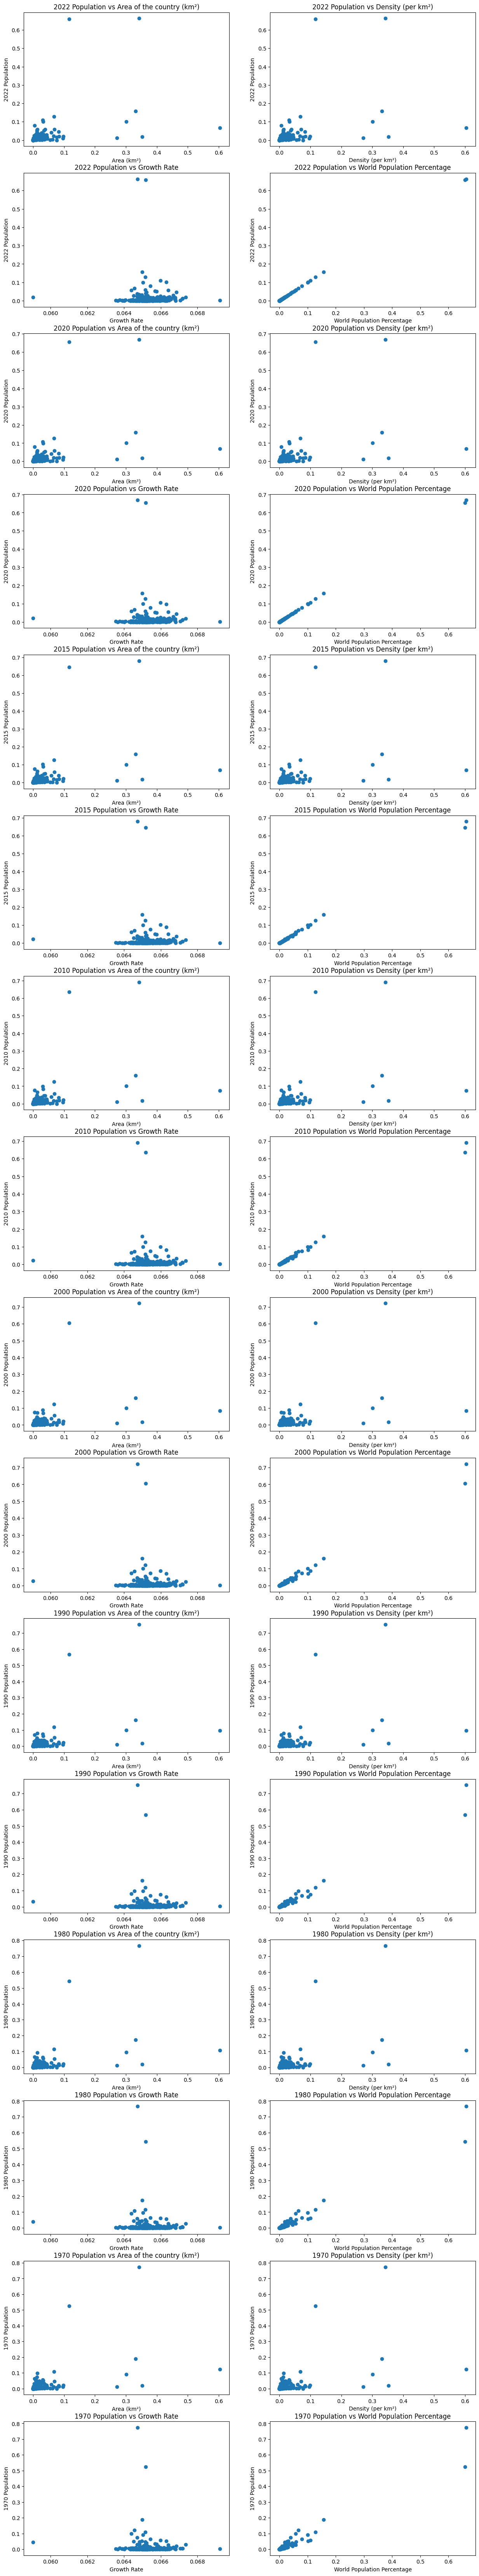

In [9]:
#Overview plots
length_population = len(population)
fig, ax = plt.subplots(2*length_population, 2, figsize = (15, 85))
for i in range(length_population):
    axis = ax[2*i:2*i+2, 0:2]
    axes0 = axis[0,:]
    axes1 = axis[1,:]
    axes0[0].scatter(preprocessing.normalize([data_1["Area (km²)"]]), preprocessing.normalize([data_1[population[i]]]))
    axes0[0].set(xlabel = "Area (km²)", ylabel = population[i], title = "{} vs Area of the country (km²)".format(population[i]))
    axes0[1].scatter(preprocessing.normalize([data_1["Area (km²)"]]), preprocessing.normalize([data_1[population[i]]]))
    axes0[1].set(xlabel = "Density (per km²)", ylabel = population[i], title = "{} vs Density (per km²)".format(population[i]))
    axes1[0].scatter(preprocessing.normalize([data_1["Growth Rate"]]), preprocessing.normalize([data_1[population[i]]]))
    axes1[0].set(xlabel = "Growth Rate", ylabel = population[i], title = "{} vs Growth Rate".format(population[i]))
    axes1[1].scatter(preprocessing.normalize([data_1["World Population Percentage"]]), preprocessing.normalize([data_1[population[i]]]))
    axes1[1].set(xlabel = "World Population Percentage", ylabel = population[i], title = "{} vs World Population Percentage".format(population[i]))


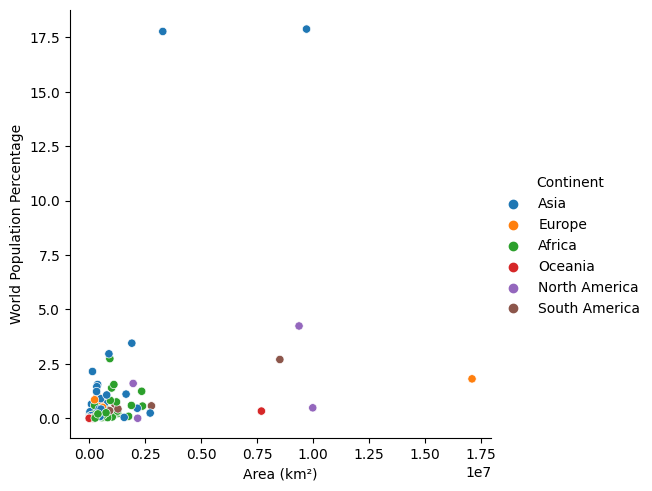

In [10]:
sns.relplot(
    data=data_1, kind="scatter",
    x="Area (km²)", y="World Population Percentage",
    hue="Continent",
    facet_kws=dict(sharex=False),
)

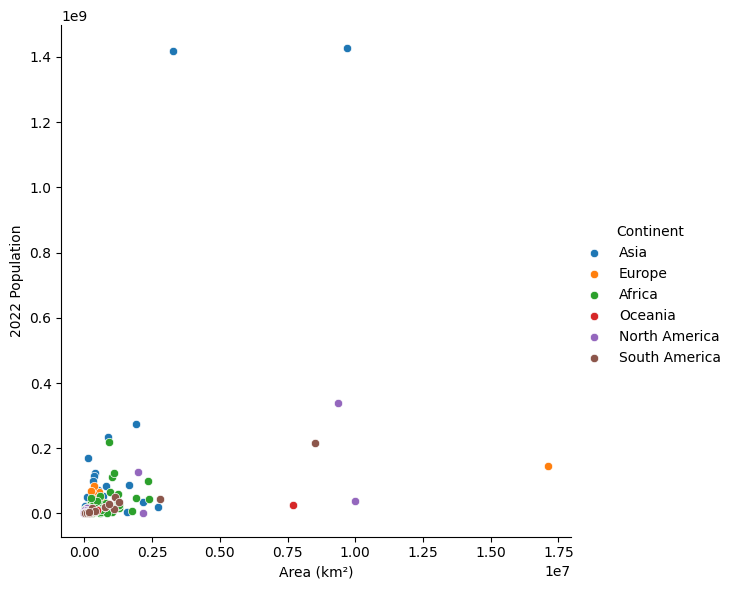

In [11]:
g = sns.FacetGrid(data_1, hue="Continent", height=6)
g.map(sns.scatterplot, "Area (km²)", '2022 Population')
g.add_legend()

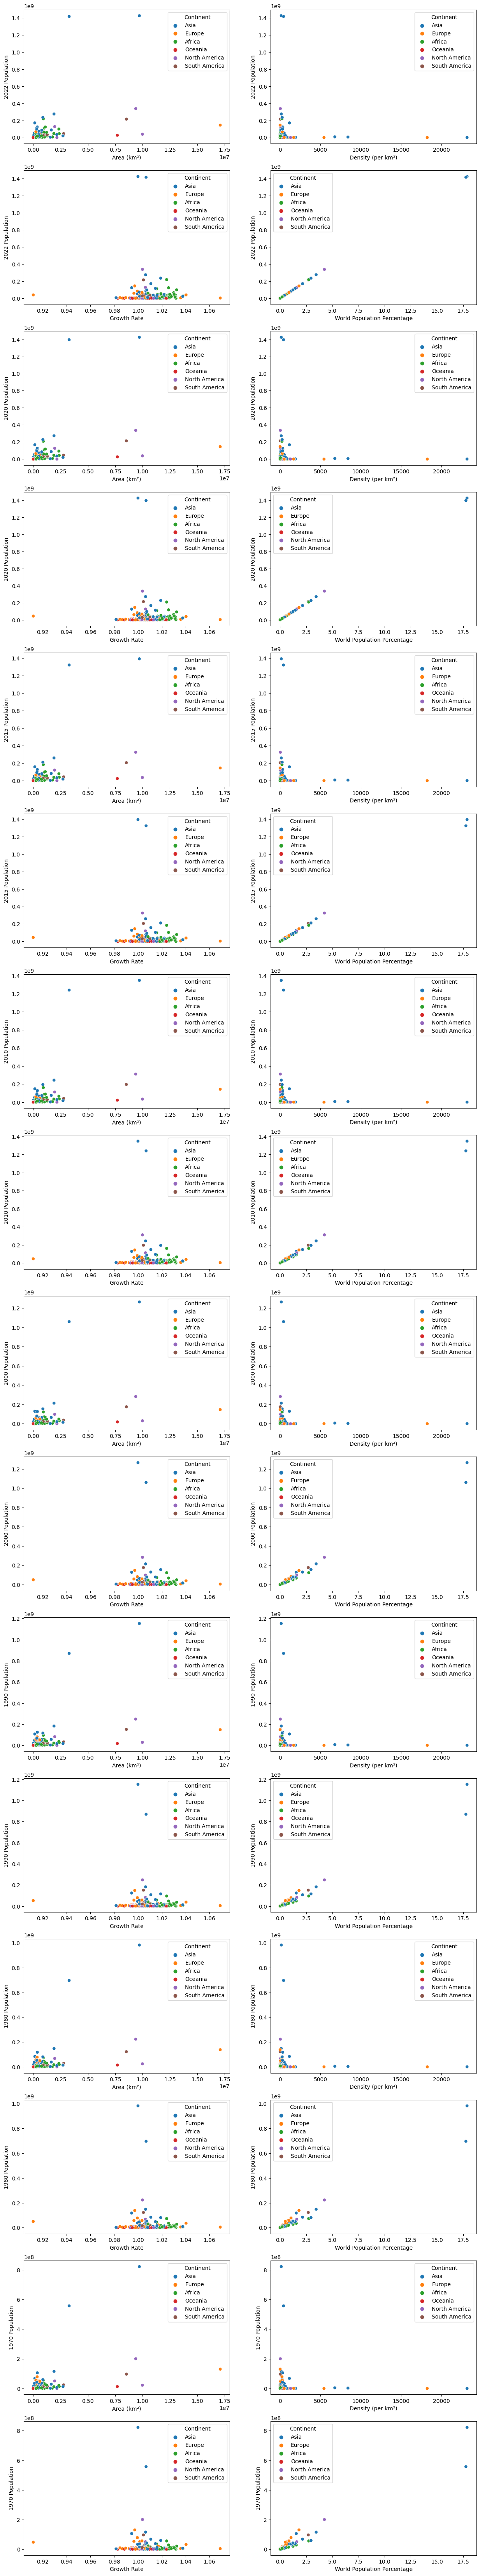

In [12]:
#Overview plots
length_population = len(population)
fig, ax = plt.subplots(2*length_population, 2, figsize = (15, 85))
for i in range(length_population):
    axis = ax[2*i:2*i+2, 0:2]
    axes0 = axis[0,:]
    axes1 = axis[1,:]
    sns.scatterplot(x='Area (km²)', y=population[i], data=data_1, ax=axes0[0], hue="Continent")
    sns.scatterplot(x='Density (per km²)', y=population[i], data=data_1, ax=axes0[1], hue="Continent")
    sns.scatterplot(x='Growth Rate',y=population[i], data=data_1, ax=axes1[0], hue="Continent")
    sns.scatterplot(x='World Population Percentage',y=population[i], data=data_1, ax=axes1[1], hue="Continent")



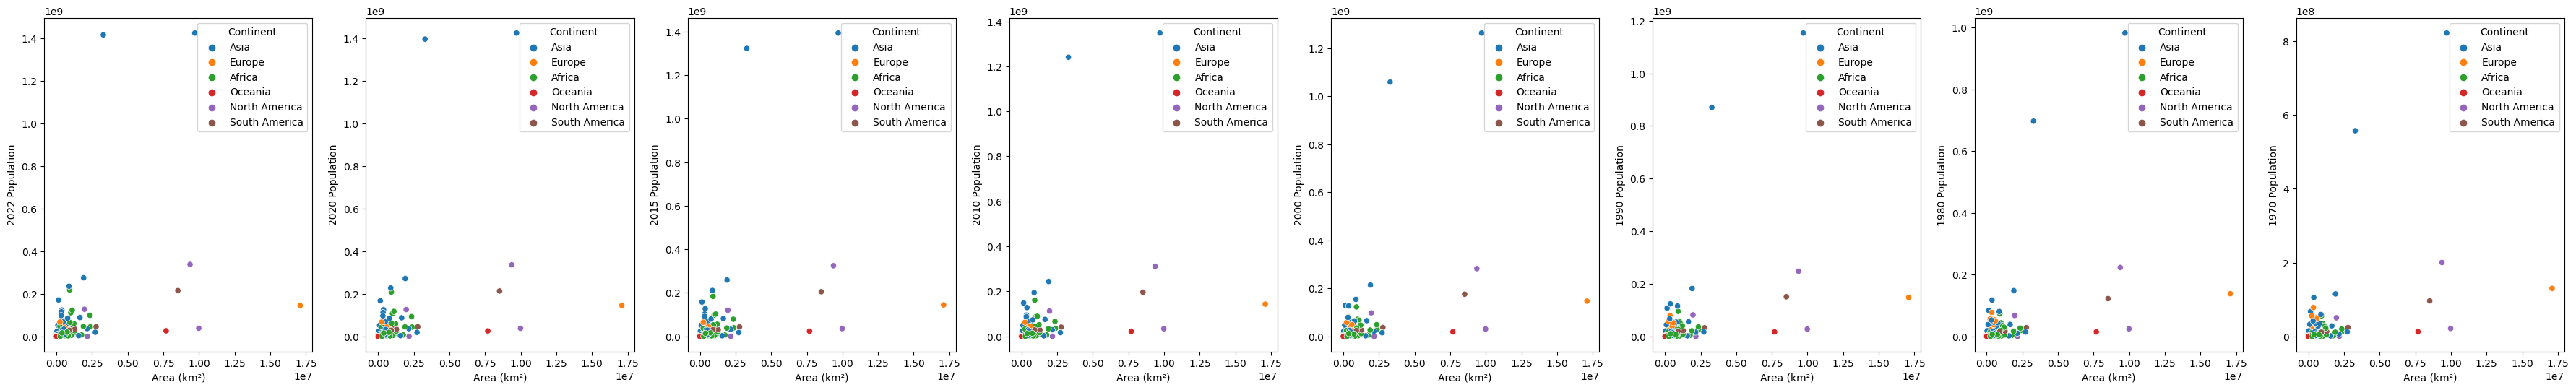

In [13]:
#How Area affects the population distribution
length_population = len(population)
fig, ax = plt.subplots(1, length_population, figsize = (45, 6))
for i in range(length_population):
    sns.scatterplot(x='Area (km²)',     y=population[i], data=data_1, ax=ax[i], hue="Continent")

In [14]:
continents = ["Asia", "Europe", "Africa", "Oceania", "North America", "South America"]
length_continents = len(continents)

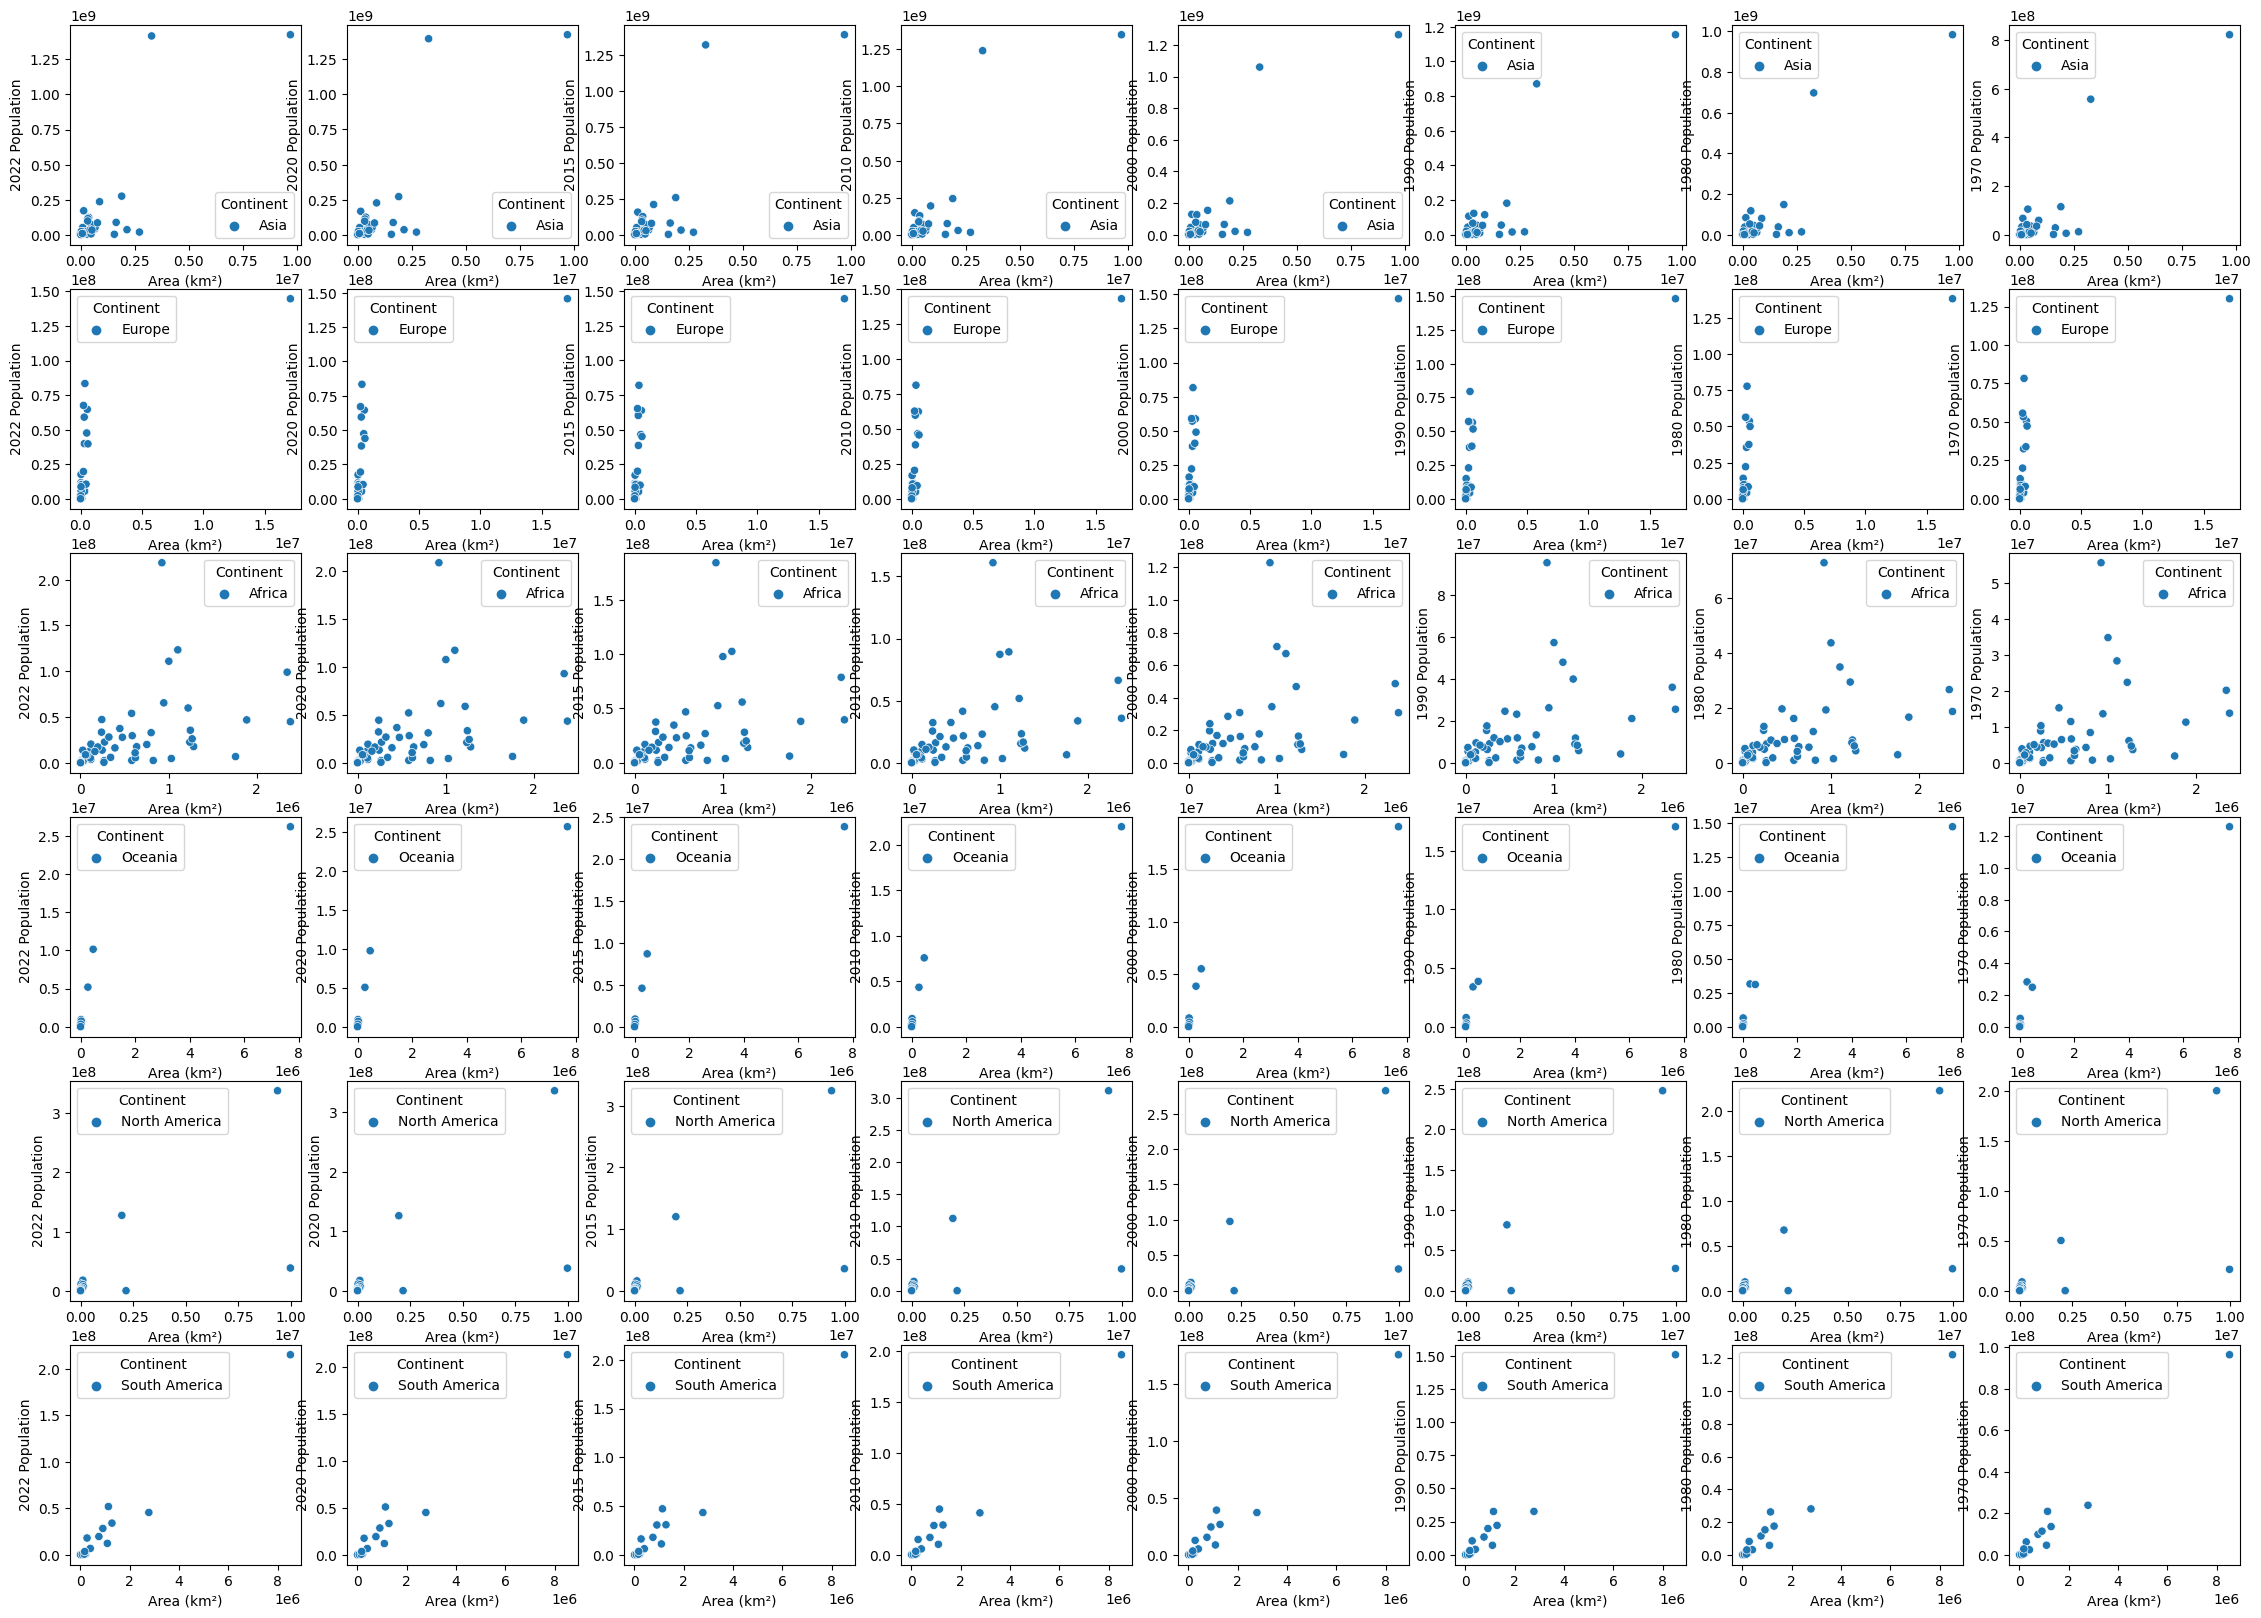

In [15]:
fig, ax = plt.subplots(length_continents, length_population, figsize = (28, 20))
for i in range(length_continents):
    for k in range(len(population)):
        df = data_1[data_1["Continent"] == continents[i]]
        sns.scatterplot(x='Area (km²)', y=population[k], data=df, ax=ax[i][k], hue="Continent")
    

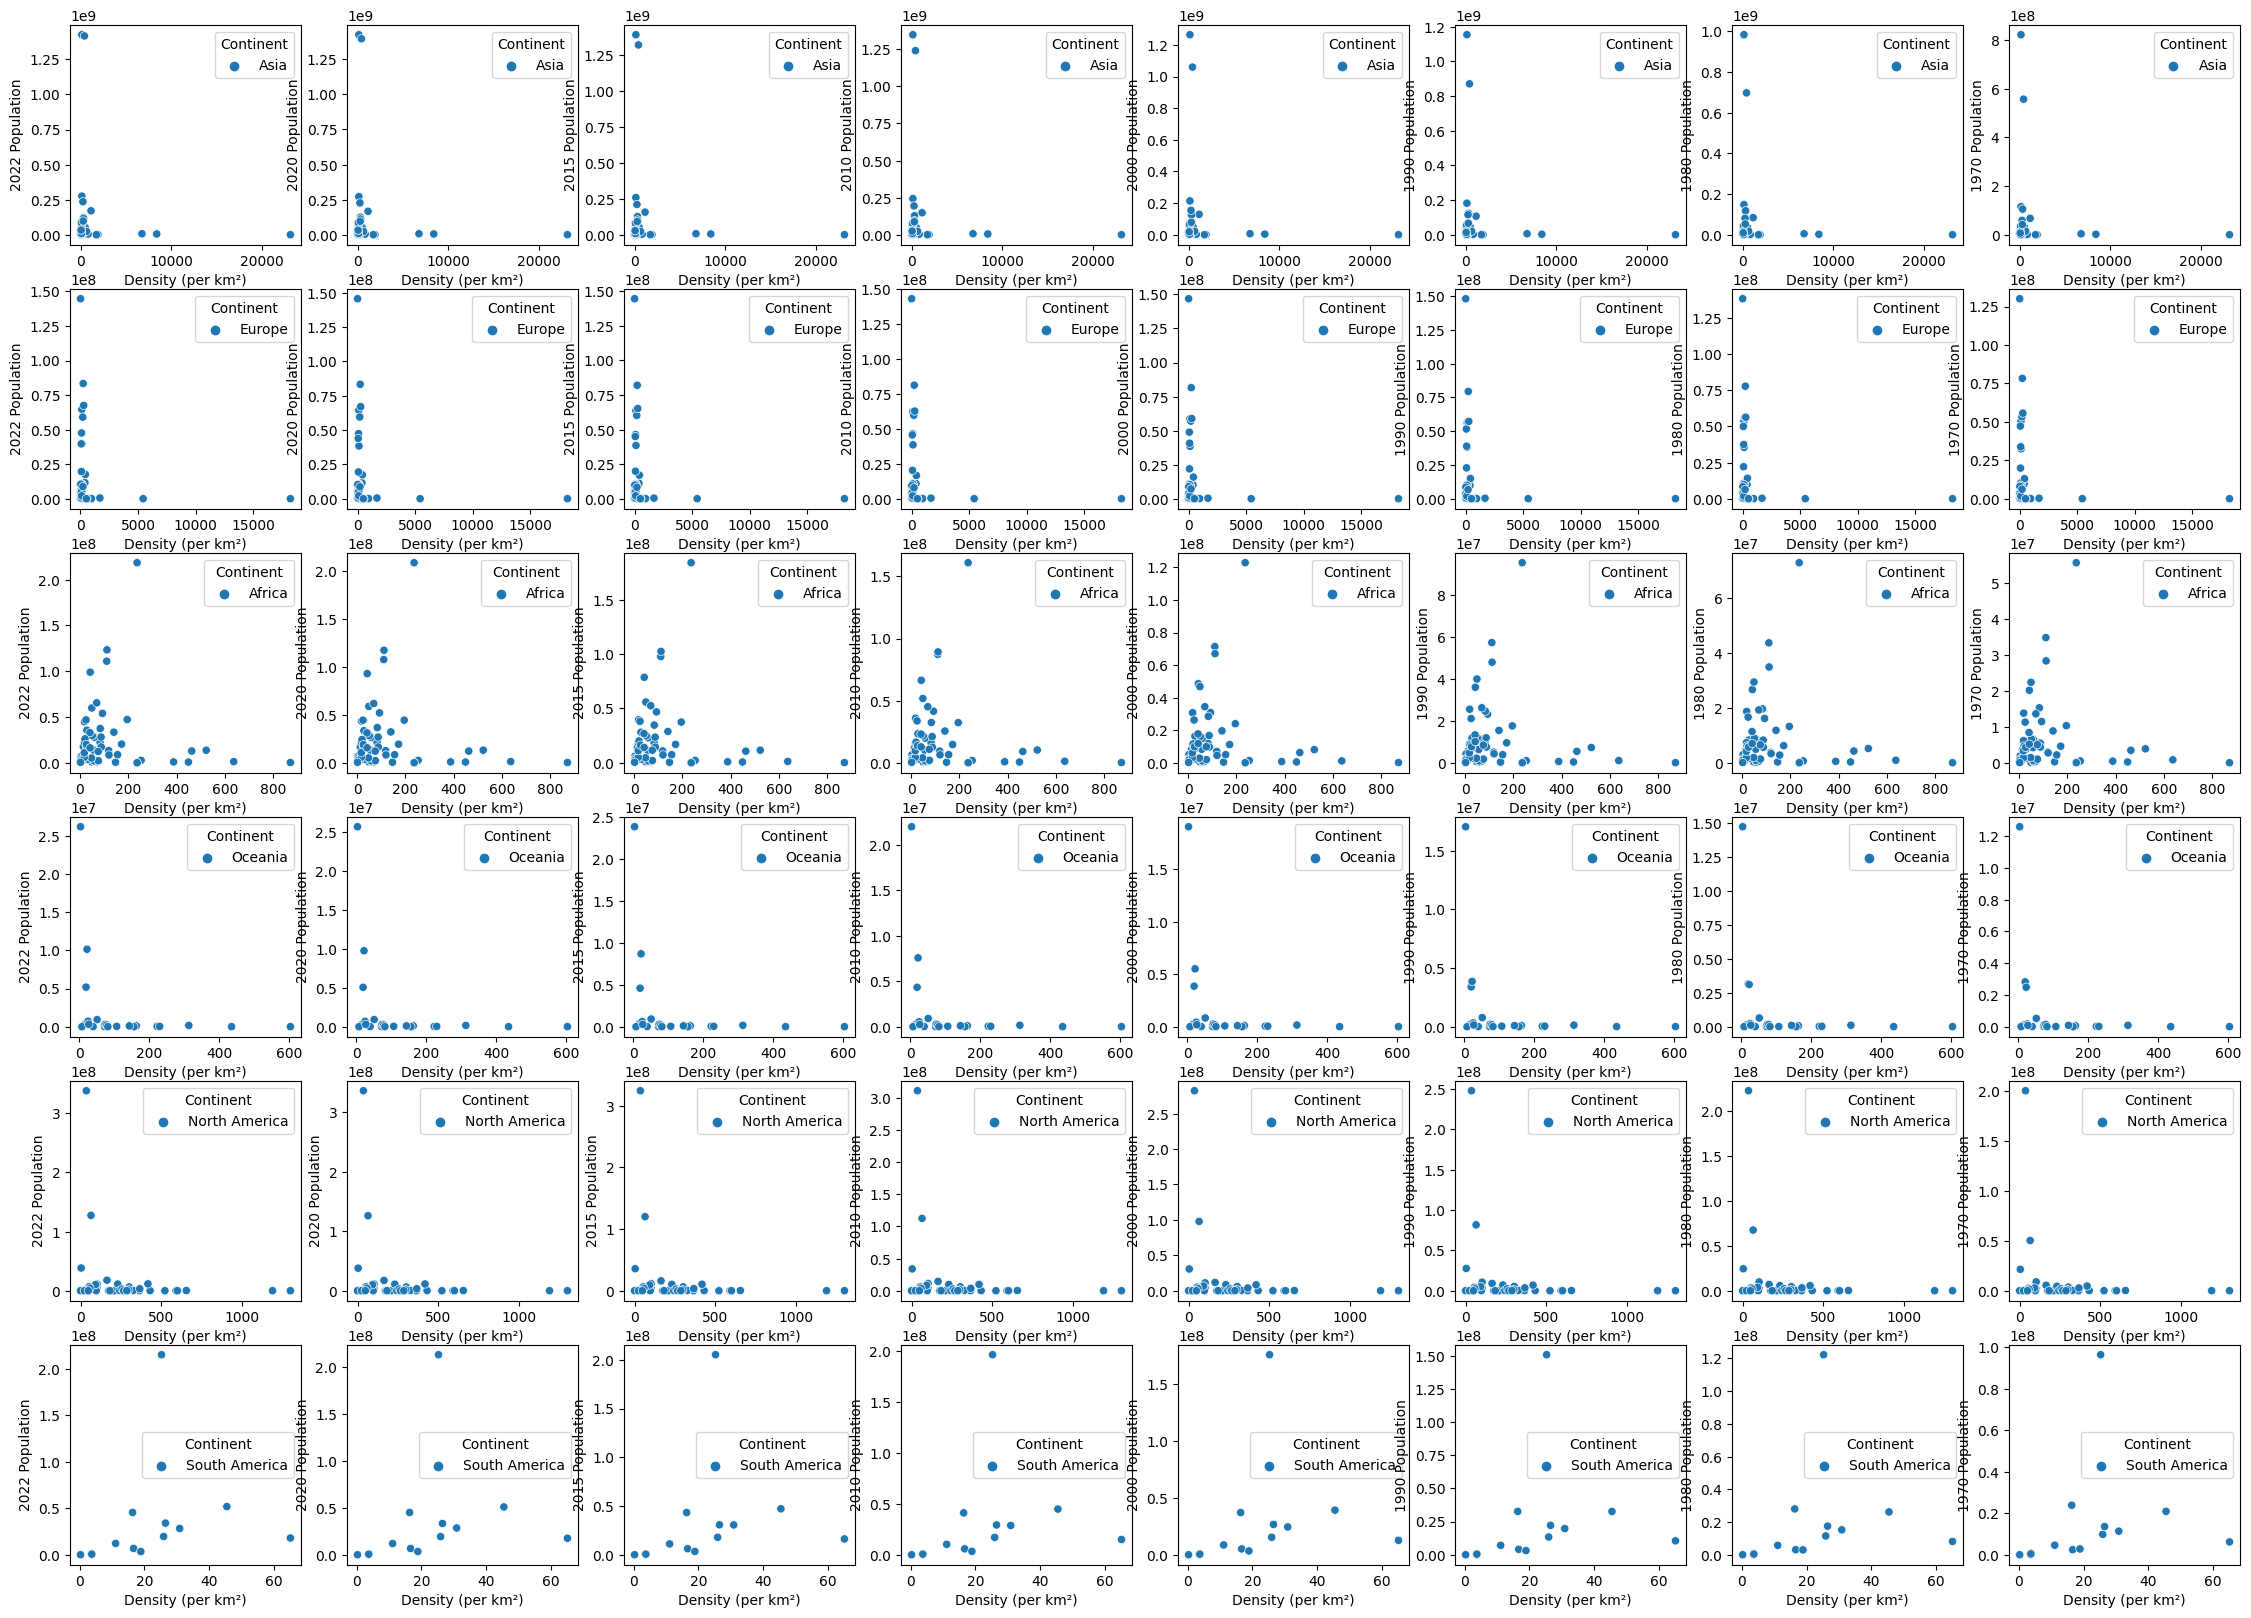

In [16]:
fig, ax = plt.subplots(length_continents, length_population, figsize = (28, 20))
for i in range(length_continents):
    for k in range(len(population)):
        df = data_1[data_1["Continent"] == continents[i]]
        sns.scatterplot(x='Density (per km²)', y=population[k], data=df, ax=ax[i][k], hue="Continent")
    

Not much of an impact created by Area or other parameters on population over years, this is intuitive.

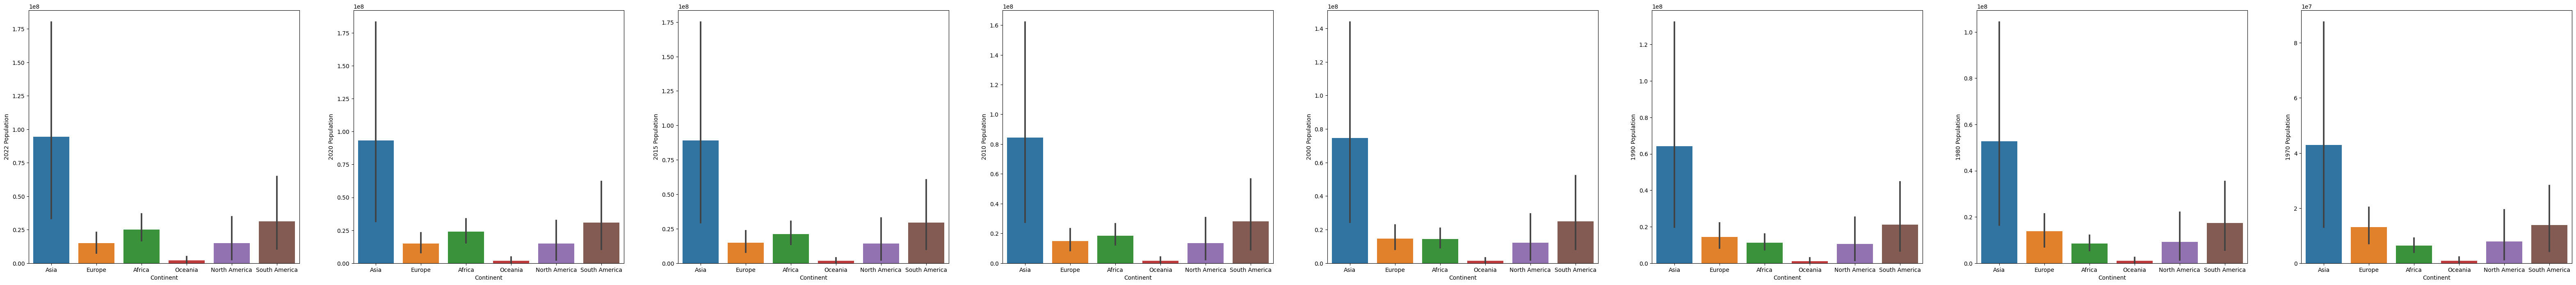

In [17]:
fig, ax = plt.subplots(1, length_population, figsize = (80, 8))
for i in range(length_population):
    sns.barplot(x='Continent', y=population[i], data=data_1, ax=ax[i])

Text(0.5, 0.98, 'Population variation for different continents over time')

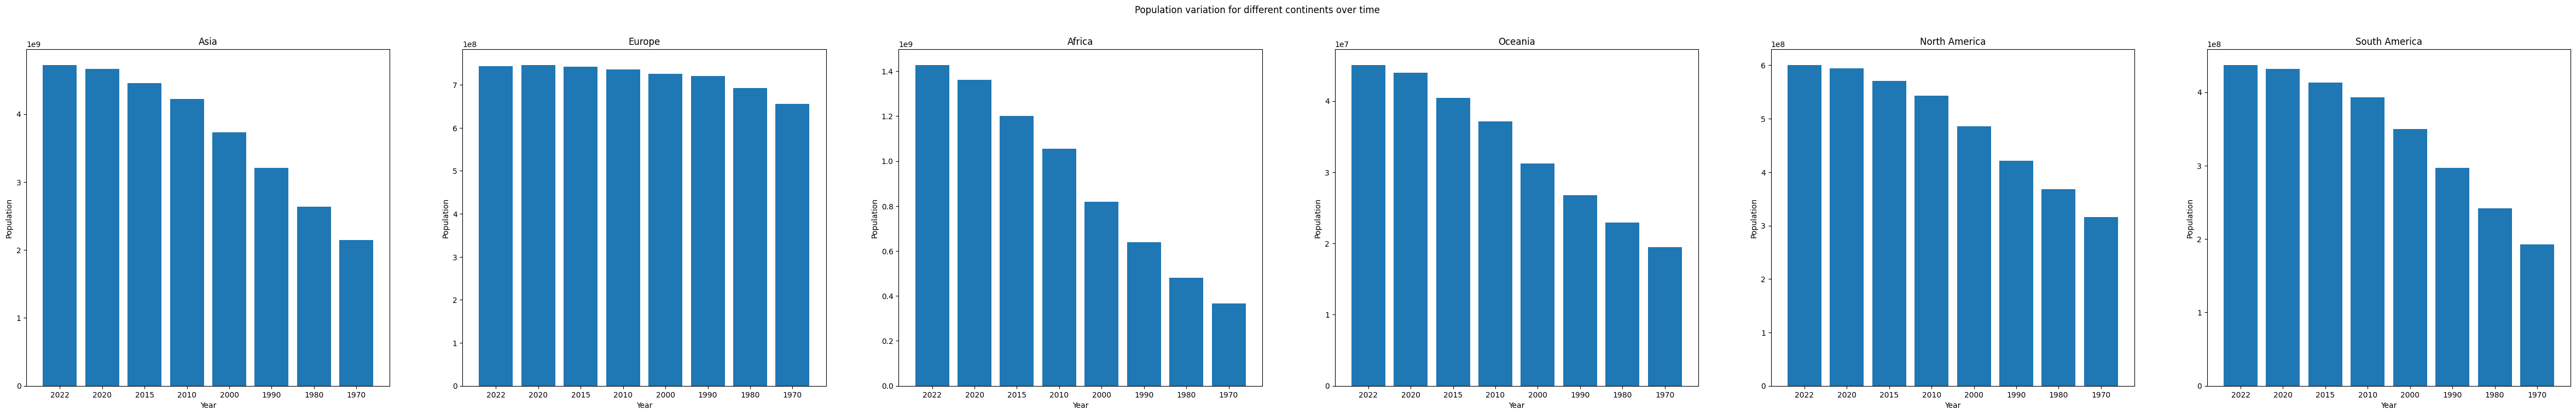

In [23]:
fig, ax = plt.subplots(1, length_continents, figsize = (60, 8))
population_modified_years_only = [i[0:4] for i in population]
for i in range(length_continents):
    df = data_1[data_1["Continent"] == continents[i]]
    sum_population = []
    for k in population:
        sum_population.append(df[k].sum())
    ax[i].bar(population_modified_years_only, sum_population)
    ax[i].set(xlabel = "Year", ylabel = "Population", title = continents[i])
fig.suptitle("Population variation for different continents over time")